### Домашнее задание к лекции "Функции потерь и оптимизация"
* Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
* Реализовать самостоятельно логистическую регрессию  
* Обучить ее:  
- Методом градиентного спуска  
- Методом nesterov momentum  
- Методом rmsprop  
В качестве dataset’а взять Iris, оставив 2 класса:  
Iris Versicolor  
Iris Virginica

In [101]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

In [53]:
print("Названия классов: {}".format(iris['target_names']))

Названия классов: ['setosa' 'versicolor' 'virginica']


In [54]:
print("Названия признаков: \n{}".format(iris['feature_names']))

Названия признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [55]:
print("Классы:\n{}".format(iris['target']))

Классы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [105]:
# оставляю два класса:Iris Versicolor and Iris Virginica
# переименовываю классы для удобства классификации 0 and 1
X = []
y = []
for idx, item in enumerate(iris.target):
    if item != 0:
        X.append(iris.data[idx])
        y.append(item-1)

X = np.asarray(X)
y = np.asarray(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [69]:
# Классифицирующая функция через сигмоиду

def predict(coefs, X):
    predict = coefs[0] + coefs[1] * X[:, 0] + coefs[2] * X[:, 1] + coefs[3] * X[:, 2] + coefs[4] * X[:, 3]
    sigm = 1. / (1 + np.exp(-predict))
    return sigm

### Метод градиентного спуска

In [77]:
lr = 0.05
coefs = []
coefs = np.random.normal(size=(5,))
print(coefs)
grad_loss_hist = []
for _ in range(50):
    sigm = predict(coefs, X)
    coefs[0] -= lr * np.sum(sigm - y)/len(sigm)
    coefs[1] -= lr * np.sum((sigm - y) * X[:, 0])/len(sigm)
    coefs[2] -= lr * np.sum((sigm - y) * X[:, 1])/len(sigm)
    coefs[3] -= lr * np.sum((sigm - y) * X[:, 2])/len(sigm)
    coefs[4] -= lr * np.sum((sigm - y) * X[:, 3])/len(sigm)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    print(coefs)
    grad_loss_hist.append(loss)

[-1.38862827 -0.61676907  0.40170305 -0.29707569  2.02538975]
[-1.36959492 -0.48939644  0.45842979 -0.18849862  2.06485586]
[-1.36310711 -0.44168996  0.47822481 -0.1438801   2.08148534]
[-1.36324632 -0.43608969  0.47876191 -0.13261437  2.08665372]
[-1.36449034 -0.43750225  0.47610703 -0.12688171  2.08994528]
[-1.36590746 -0.44002265  0.47295134 -0.12203591  2.09293411]
[-1.36735043 -0.44271823  0.46971964 -0.11734403  2.09586785]
[-1.36879526 -0.44543696  0.46648114 -0.11268658  2.09878689]
[-1.370238   -0.44815386  0.46324722 -0.10804388  2.10169787]
[-1.37167801 -0.45086483  0.46001973 -0.10341265  2.10460192]
[-1.3731152  -0.4535692   0.45679898 -0.09879232  2.10749925]
[-1.37454956 -0.4562669   0.45358498 -0.09418275  2.11038992]
[-1.37598108 -0.45895792  0.45037774 -0.08958391  2.11327395]
[-1.37740979 -0.46164228  0.44717723 -0.08499574  2.11615138]
[-1.37883569 -0.46432002  0.44398343 -0.08041822  2.11902222]
[-1.38025879 -0.46699115  0.44079633 -0.0758513   2.12188651]
[-1.3816

In [78]:
# смотрю количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

12

In [81]:
# сравниваю результаты классификации

rez_predict = np.matrix([np.around(predict(coefs, X)), y])
rez_predict

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]])

### Метод nesterov momentum

In [86]:
# обучение модели методом nesterov momentum

vel_pred = np.zeros(5)
vel = np.zeros(5)
print(coefs)
nest_loss_hist = []
gamma = 0.975
for _ in range(50):
    sigm = predict(coefs, X)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    nest_loss_hist.append(loss)
    
    sigm = predict(coefs - gamma * vel_pred, X)
    
    vel[0] = (gamma * vel_pred[0] + lr * np.sum(sigm - y))/len(sigm)
    vel[1] = (gamma * vel_pred[1] + lr * np.sum((sigm - y) * X[:, 0]))/len(sigm)
    vel[2] = (gamma * vel_pred[2] + lr * np.sum((sigm - y) * X[:, 1]))/len(sigm)
    vel[3] = (gamma * vel_pred[3] + lr * np.sum((sigm - y) * X[:, 2]))/len(sigm)
    vel[4] = (gamma * vel_pred[4] + lr * np.sum((sigm - y) * X[:, 3]))/len(sigm)
    coefs -= vel
    print(coefs)

    vel_pred = vel

[-1.49242075 -0.67312307  0.19133544  0.27859187  2.34481767]
[-1.49363819 -0.67532728  0.18864765  0.28235166  2.34719692]
[-1.49485872 -0.67751385  0.1859573   0.28615595  2.349598  ]
[-1.49608196 -0.67972558  0.18325837  0.28992907  2.3519866 ]
[-1.49729719 -0.68189504  0.18058166  0.29372373  2.35438041]
[-1.49851692 -0.68410132  0.17789115  0.2974778   2.35675852]
[-1.49972678 -0.6862535   0.17522824  0.30126278  2.35914501]
[-1.50094348 -0.68845724  0.17254479  0.30499568  2.36151195]
[-1.50214777 -0.69059072  0.16989629  0.30877226  2.36389158]
[-1.50336191 -0.69279482  0.16721856  0.31248188  2.36624667]
[-1.50456026 -0.69490717  0.16458555  0.31625214  2.36862017]
[-1.50577239 -0.69711499  0.16191196  0.31993598  2.3709626 ]
[-1.50696429 -0.69920282  0.15929594  0.32370274  2.37333096]
[-1.50817509 -0.70141854  0.15662457  0.32735769  2.37565972]
[-1.50935984 -0.70347739  0.15402754  0.33112461  2.3780242 ]
[-1.51057016 -0.70570629  0.15135594  0.33474668  2.38033799]
[-1.5117

In [87]:
# смотрю количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

9

### Метод RMSProp

In [88]:
# обучение модели методом RMSProp

e_sq_grad = np.zeros(5)
grad = np.zeros(5)
print(coefs)
rmsp_loss_hist = []
gamma = 0.975
eps = 0.00000001
for _ in range(50):
    sigm = predict(coefs, X)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    rmsp_loss_hist.append(loss)
    grad[0] = np.sum(sigm - y)/len(sigm)
    grad[1] = np.sum((sigm - y) * X[:, 0])/len(sigm)
    grad[2] = np.sum((sigm - y) * X[:, 1])/len(sigm)
    grad[3] = np.sum((sigm - y) * X[:, 2])/len(sigm)
    grad[4] = np.sum((sigm - y) * X[:, 3])/len(sigm)
    
    e_sq_grad = gamma * e_sq_grad + (1 - gamma)  * grad ** 2
    
    coefs -= lr * grad / np.sqrt(e_sq_grad + eps)
    print(coefs)

[-1.55070054 -0.77445808  0.06382277  0.46204409  2.46034059]
[-1.86685733 -1.09067742 -0.25239223  0.77820619  2.77650207]
[-1.55526824 -0.77528512  0.06093555  1.09429058  3.09163083]
[-1.8517264  -1.06627554 -0.23294324  0.81271271  2.81922223]
[-1.7941627  -0.99723076 -0.17050192  0.89636944  2.9131819 ]
[-1.87079317 -1.06772179 -0.24593355  0.83355069  2.85567424]
[-1.82525693 -1.01155317 -0.19607779  0.90295572  2.93405769]
[-1.88814557 -1.06796583 -0.25749921  0.85463605  2.89124314]
[-1.85505543 -1.02489366 -0.22054246  0.90993857  2.95458014]
[-1.90612622 -1.06915621 -0.26991266  0.87415643  2.92446328]
[-1.88282691 -1.03628867 -0.24304792  0.91862737  2.97638556]
[-1.92537189 -1.07174275 -0.28370784  0.89197878  2.95553719]
[-1.90895989 -1.04599507 -0.2639118   0.92897338  2.9996402 ]
[-1.94583459 -1.07555274 -0.29876296  0.90848203  2.9850581 ]
[-1.93397728 -1.0544682  -0.28362044  0.94063126  3.02411673]
[-1.9673183  -1.08031679 -0.31483753  0.92405446  3.01353445]
[-1.9582

In [91]:
# смотрю количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

3

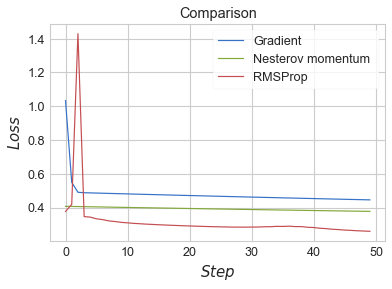

In [104]:
# Сравниваю скорость убывания ошибки

plt.plot(range(50), grad_loss_hist, label = 'Gradient' )
plt.plot(range(50), nest_loss_hist, label = 'Nesterov momentum ' )
plt.plot(range(50), rmsp_loss_hist, label = 'RMSProp ' )
plt.title('Comparison')
plt.xlabel('$Step$', fontsize = 15)
plt.ylabel('$Loss$', fontsize = 15)
plt.legend()
plt.show()

#### RMSProp показал лучший результат